In [238]:
import pandas as pd
import csv
import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import numpy as np
from IPython import display
import sklearn.preprocessing as sp
from sklearn import tree
import subprocess
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [254]:
label_data = pd.read_csv("wine_data.csv",encoding="shift_jis")
#38..TEST(0.717)
#15..STUDY(0.283)
label_data

,wine_name,red_white,sperkring,cost,sweet,Astringency,acidity,Fruit,drinkable_temperature,alcohol,feature_level,Evaluation
0,アントルコート･メルロー･カベルネ･ソーヴィニヨン,0,0.0,1980,1,5,3,3,17,13.0,2.0,7
1,ブルゴーニュアリゴテ,1,0.0,3480,1,3,4,3,10,12.0,2.0,1
2,サラダ ガルナッチャ ティントレラ,0,0.0,930,1,4,3,3,17,12.0,1.0,5
3,コノスル シャルドネ ビシクレタ,1,0.0,880,3,3,3,4,8,13.5,2.0,1
4,レゼルヴァ ドス アミーゴス トゥーリガ ナショナル,0,0.0,1080,2,4,1,2,15,14.0,1.5,6
5,ブライダ･ブラケット･ダックイ,0,0.5,2780,4,3,3,4,9,5.5,0.0,5
6,サンテロ 天使のアスティ白,1,1.0,1540,5,1,2,2,10,7.5,0.0,6
7,サンテロ 天使のアスティ赤,0,1.0,1540,5,1,2,4,12,7.5,0.0,6
8,カンティ･ロゼ,0,1.0,880,4,1,2,3,8,7.5,0.7,2
9,苺のワインスパークリング,0,1.0,750,5,1,2,4,8,6.0,0.0,4


In [248]:
label_start = 1
label_end = 11
y = label_data["Evaluation"]
x = label_data.iloc[:,label_start:label_end]

RangeIndex(start=0, stop=53, step=1)


In [249]:
new_label = []

for v in list(y):
    if int(v) == 0:
        new_label += ["NULL"]
    else:
#         new_label += [int(v)]
        if int(v) <= 2:
            new_label += ["BAD"]
        else:
            if int(v) <= 5:
                new_label += ["NORMAL"]
            else:
                new_label += ["GOOD"]

y=new_label
print(list(y))

['GOOD', 'BAD', 'NORMAL', 'BAD', 'GOOD', 'NORMAL', 'GOOD', 'GOOD', 'BAD', 'NORMAL', 'BAD', 'GOOD', 'GOOD', 'BAD', 'NORMAL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL']


In [250]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.715,train_size=0.285,shuffle = False)

In [251]:
clf = tree.DecisionTreeClassifier(min_samples_split=3)
clf = clf.fit(x_train,y_train)
predicted = clf.predict(x_test)
predicted

array(['GOOD', 'BAD', 'BAD', 'BAD', 'NORMAL', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'BAD', 'BAD', 'BAD', 'BAD',
       'BAD', 'BAD', 'BAD', 'BAD', 'BAD', 'GOOD', 'BAD', 'BAD', 'BAD',
       'NORMAL', 'NORMAL', 'BAD', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'GOOD', 'NORMAL'], dtype='<U6')

In [252]:
tree.export_graphviz(clf, out_file="tree.dot",
                     feature_names=["red_0,white_1","spekring_1","cost","sweet","Astringency","acidry","fruit","drinkable_temp","alcohol","feature_level"],
                     class_names=["1","2","3","4","5","6","7"],
                     #class_names=["BAD","NORMAL","GOOD"],
                     filled=True, rounded=True)

cmd = "dot -Tpng tree.dot -o tree.png"
runcmd = subprocess.run(cmd.split(),stdout = subprocess.PIPE, stderr = subprocess.PIPE,shell=True)
print(runcmd.stdout.decode("cp932"))

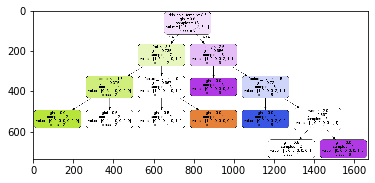

In [253]:
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)